## Single logic network using multilayer perceptron neuron model

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [18]:
iris = load_iris() 
X, y = iris.data, iris.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [22]:
param_grid = {
    'hidden_layer_sizes': [(64,32), (128,64), (32,16)],
    'activation': ['relu', 'tanh'],
    'max_iter': [1000, 2000],
    'alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],
                         'max_iter': [1000, 2000]})

In [23]:
print(f"Best params: {grid_search.best_params_}")

Best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'max_iter': 1000}


In [24]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


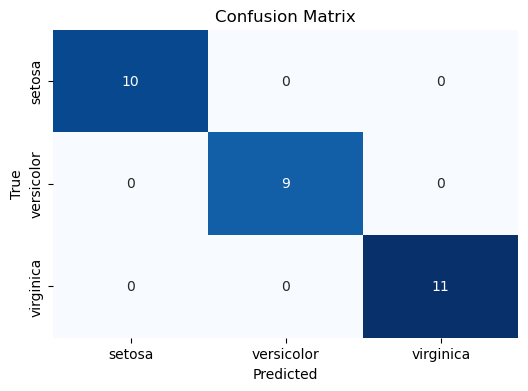

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()